# Data Profiling

## Setup

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Aux Functions

In [4]:
def cast_object_to_categorical(data):
    cat_vars = data.select_dtypes(include='object')
    data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    return data

## Data Dimensionality

### Heart Failure Dataset

* ratio between nr of records and nr variables is good enough?
* 

(299, 13)


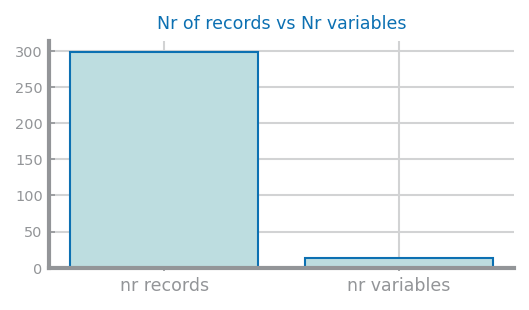

In [5]:
print(data1.shape)

plt.figure(figsize=(4,2))
values = {'nr records': data1.shape[0], 'nr variables': data1.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs Nr variables')
plt.savefig('sample.png')

#### Variables' Type

In [6]:
data1.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### Missing Values

* There are no missing values

### Oral Toxicity Dataset

* ratio between nr of records and nr variables is good enough?
* 

(8991, 1025)


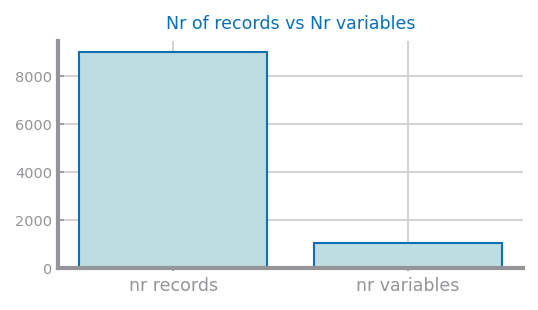

In [6]:
print(data2.shape)

plt.figure(figsize=(4,2))
values = {'nr records': data2.shape[0], 'nr variables': data2.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs Nr variables')

#### Variables' Type

In [8]:
data2.dtypes

0            int64
0.1          int64
0.2          int64
0.3          int64
0.4          int64
             ...  
0.967        int64
0.968        int64
0.969        int64
0.970        int64
negative    object
Length: 1025, dtype: object

In [9]:
data2 = cast_object_to_categorical(data2)
data2.shape

(8991, 1025)

#### Missing Values

* There are no missing values

## Data Distribution 

## Data Granularity

### Heart Failure Dataset

{'nr records': 299, 'nr variables': 13}
7/13 variables plotted


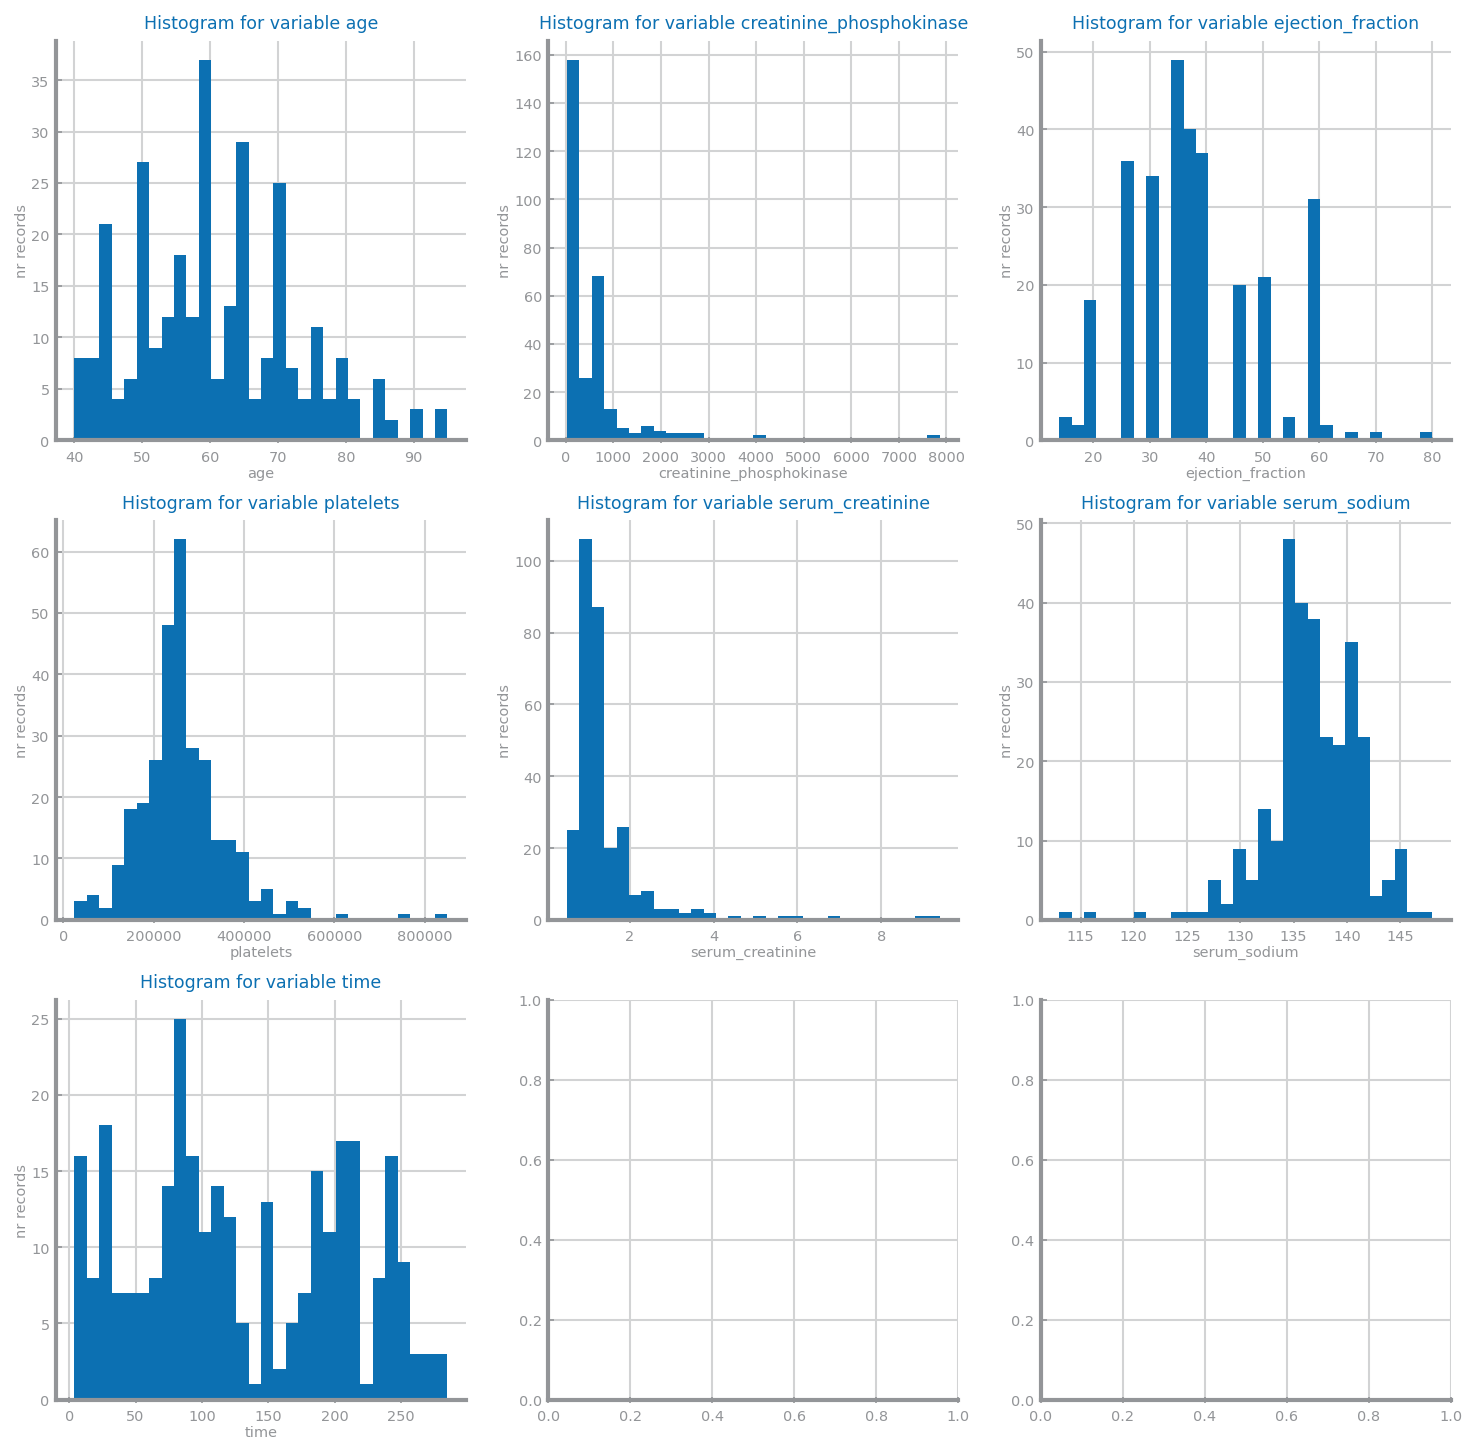

binary now


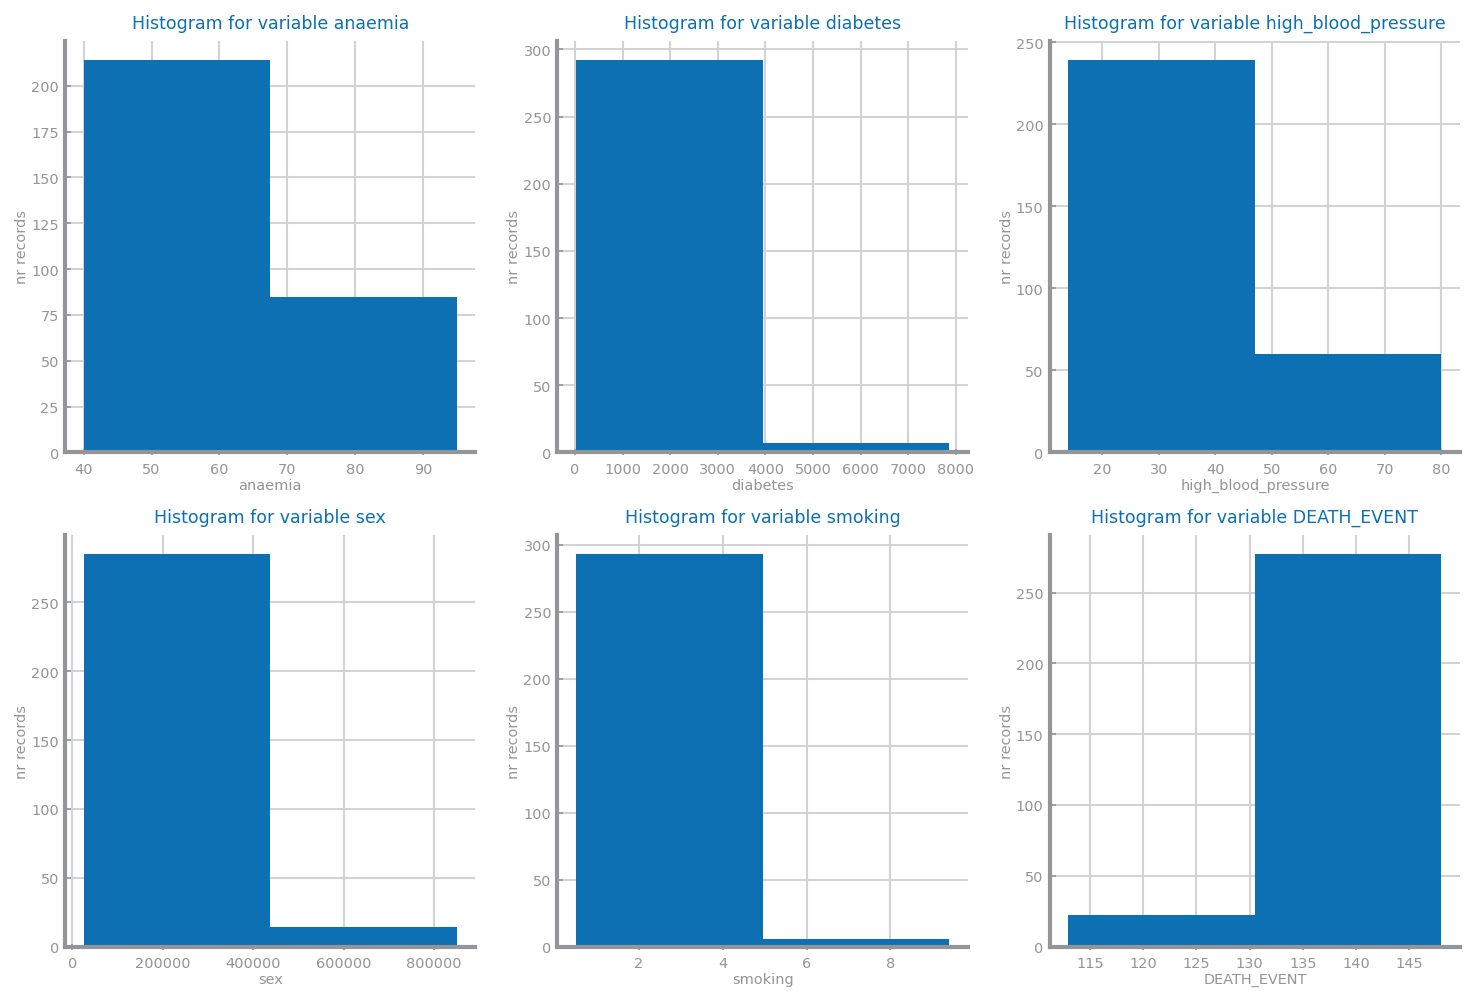

In [9]:
values = {'nr records': data1.shape[0], 'nr variables': data1.shape[1]}
print(values)

variables = data1.select_dtypes(include='number').columns
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
variables = variables.drop(binary_cols)
print(str(len(variables)) + "/" + str(values['nr variables']) + " variables plotted")

rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

for n in range(len(variables)):
    axs[i, j].set_title('Histogram for variable {}'.format(variables[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data1[variables[n]].values, bins=30)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

plt.show()

print('binary now')
binary_variables = data1.copy()[binary_cols].columns

rows, cols = ds.choose_grid(len(binary_variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(binary_variables)):
    axs[i, j].set_title('Histogram for variable {}'.format(binary_variables[n]))
    axs[i, j].set_xlabel(binary_variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data1[variables[n]].values, bins=2)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()


hi [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3000]
3 3 7


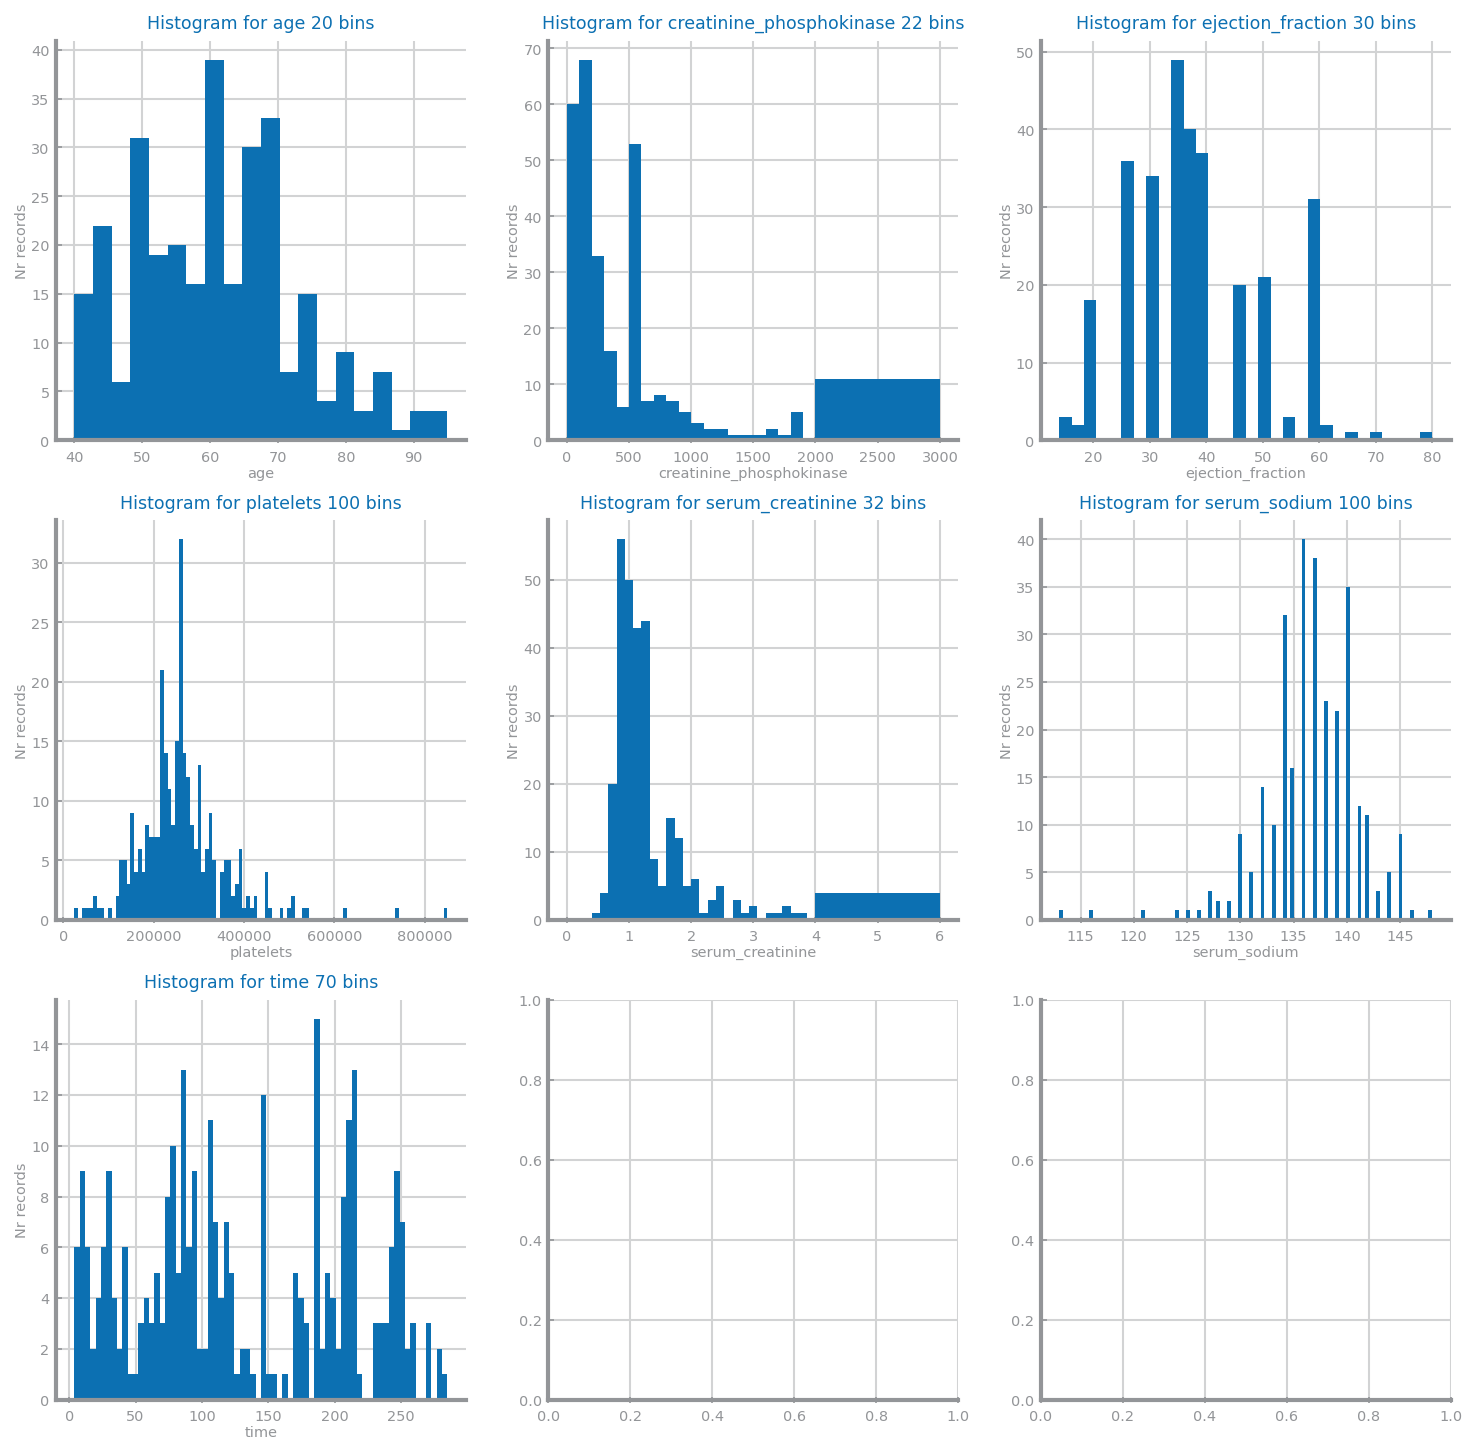

In [24]:
variables = data1.select_dtypes(include='number').columns
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
variables = variables.drop(binary_cols)

best_bins = {
    'age': 20,
    'creatinine_phosphokinase': list(x * 100 for x in range(20)) + [2000, 3000],
    'ejection_fraction': 30,
    'platelets': 100,
    'serum_creatinine': list(x*4/30 for x in range(30)) + [4, 6],
    'serum_sodium': 100,
    'time': 70
}

print('hi', best_bins['creatinine_phosphokinase'])


rows, cols = ds.choose_grid(len(variables))
print(rows, cols, len(variables))

i, j, n = 0, 0, 0
fig, axs = plt.subplots(rows, cols, figsize=(rows*ds.HEIGHT, cols*ds.HEIGHT))
for v in variables:
    b = best_bins[v]
    axs[i, j].set_title('Histogram for {} {} bins'.format(v, b if type(b) == int else len(b)))
    axs[i, j].set_xlabel(v)
    axs[i, j].set_ylabel('Nr records')
    axs[i, j].hist(data1[v].values, bins=best_bins[v])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    n += 1
    
plt.show()






### Oral toxicity dataset

In [93]:
variables = data2.columns

i = 0
h_zeroes = 0
h_ones = 0
weird = []
for v in variables:
    zeroes = 0
    ones = 0
    for r in data2[v]:
        if r == 1:
            ones += 1
        elif r == 0:
            zeroes += 1
        else:
            weird.append(r)
    if zeroes > 100:
        h_zeroes += 1
    if ones > 100:
        h_ones += 1
    i += 1

print(h_zeroes, h_ones, len(variables))

1024 1009 1025


## Data Sparsity 

In [9]:
df = data2.copy()
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

count65 = 0
count75 = 0
count85 = 0
count95 = 0
for column in upper_tri.columns:
    for corr in upper_tri[column]:
        if corr >= 0.65:
            count75 += 1
        if corr >= 0.75:
            count75 += 1
        if corr >= 0.85:
            count85 += 1
        if corr >= 0.95:
            count95 += 1

print('0.65')
print(count65)            
print(count65/df.shape[0])
print('0.75')
print(count75)            
print(count75/df.shape[0])
print('\n0.85')
print(count85)            
print(count85/df.shape[0])
print('\n0.95')
print(count95)            
print(count95/df.shape[0])

0.65
0
0.0
0.75
713
0.07930152374596819

0.85
127
0.01412523634745857

0.95
21
0.002335669002335669


* ## 2 melhores features (quase linearmente separáveis)

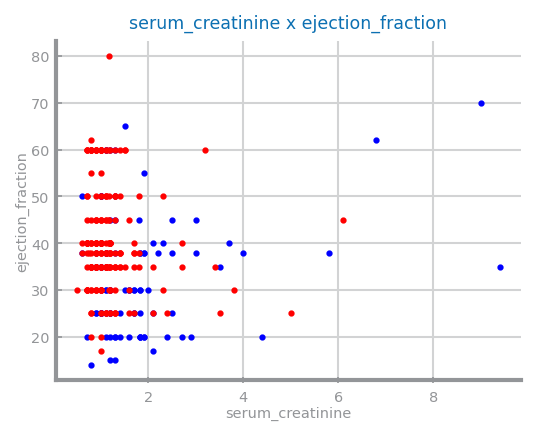

In [19]:
df = data1.copy()

columns = df.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
'''fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        
        pos = df.loc[df['DEATH_EVENT'] == 1]
        neg = df.loc[df['DEATH_EVENT'] == 0]
        
        axs[i, j-1].scatter(pos[var1], pos[var2], c='blue')
        axs[i, j-1].scatter(neg[var1], neg[var2], c='red')
        #axs[i, j-1].scatter(data1[var1], data1[var2], c=data1['DEATH_EVENT'], cmap="RdBu")'''

pos = df.loc[df['DEATH_EVENT'] == 1]
neg = df.loc[df['DEATH_EVENT'] == 0]

var1 = 'serum_creatinine'
var2 = 'ejection_fraction'

plt.title("%s x %s"%(var1,var2))
plt.xlabel(var1)
plt.ylabel(var2)
    
plt.scatter(pos[var1], pos[var2], c='blue')
plt.scatter(neg[var1], neg[var2], c='red')
plt.show()